### Analyzing Fitness Data to Uncover Activity Patterns and Health Outcomes

#### Scope and Purpose:

The aim of this project is to analyze user activity and fitness data to uncover patterns in physical behaviors and their correlations with health outcomes like calories burned. By understanding these patterns, the project seeks to provide insights that could help in designing better health and fitness interventions.

We utilize a one-month dataset adapted from https://www.kaggle.com/datasets/arashnic/fitbit

#### Questions to Explore:

1. What are the common patterns of physical activity among different users?
2. How do activity levels correlate with calories burned?
3. What is the trend of total steps and calories overtime, including their relationship?
4. Are there any visible trends in activity levels over longer periods, such as weeks or months?
5. How do various activity levels (sedentary, light, moderate, very active) impact overall health metrics?

#### Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
activity = pd.read_csv('Resources\dailyActivity_merged.csv')
sleep = pd.read_csv('Resources\sleepDay_merged.csv')

In [3]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
# Merge the dataframes

combined_df = pd.merge(activity, sleep, on = 'Id', how = 'outer')

combined_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016 12:00:00 AM,1.0,327.0,346.0
1,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/13/2016 12:00:00 AM,2.0,384.0,407.0
2,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/15/2016 12:00:00 AM,1.0,412.0,442.0
3,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/16/2016 12:00:00 AM,2.0,340.0,367.0
4,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/17/2016 12:00:00 AM,1.0,700.0,712.0


In [6]:
# Dataset info

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        12668 non-null  int64  
 1   ActivityDate              12668 non-null  object 
 2   TotalSteps                12668 non-null  int64  
 3   TotalDistance             12668 non-null  float64
 4   TrackerDistance           12668 non-null  float64
 5   LoggedActivitiesDistance  12668 non-null  float64
 6   VeryActiveDistance        12668 non-null  float64
 7   ModeratelyActiveDistance  12668 non-null  float64
 8   LightActiveDistance       12668 non-null  float64
 9   SedentaryActiveDistance   12668 non-null  float64
 10  VeryActiveMinutes         12668 non-null  int64  
 11  FairlyActiveMinutes       12668 non-null  int64  
 12  LightlyActiveMinutes      12668 non-null  int64  
 13  SedentaryMinutes          12668 non-null  int64  
 14  Calori

In [7]:
# Drop the columns that are not needed

combined_df = combined_df.drop(['SleepDay', 'TotalSleepRecords'], axis = 1)

combined_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,327.0,346.0
1,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,384.0,407.0
2,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,412.0,442.0
3,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,340.0,367.0
4,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,700.0,712.0


In [8]:
# Check for missing values

combined_df.isnull().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
TotalMinutesAsleep          227
TotalTimeInBed              227
dtype: int64

In [9]:
# Duplicate values

combined_df.duplicated().sum()

93

In [10]:
# Drop the duplicate values

combined_df = combined_df.drop_duplicates()

combined_df.duplicated().sum()

0

In [11]:
# combined_df.to_csv('Resources\combined_data.csv', index = False)

#### Exploratory Data Analysis

In [12]:
# Descriptive statistics

combined_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
count,1.257500e+04,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12348.00000,12348.000000
mean,5.023131e+09,8114.591412,5.732623,5.725726,0.119265,1.405113,0.725973,3.537853,0.000746,23.888191,17.221392,200.188469,806.174155,2323.049861,419.10277,458.197522
std,2.067341e+09,4496.623005,3.270170,3.262722,0.545429,1.950619,1.033417,1.878940,0.007866,34.811733,22.952582,97.496668,270.027933,759.663725,118.94410,127.870617
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.00000,61.000000
25%,3.977334e+09,4676.000000,3.180000,3.180000,0.000000,0.000000,0.000000,2.350000,0.000000,0.000000,0.000000,144.000000,660.000000,1776.000000,361.00000,402.000000
50%,4.702922e+09,8580.000000,6.110000,6.110000,0.000000,0.530000,0.400000,3.540000,0.000000,8.000000,10.000000,201.000000,738.000000,2158.000000,432.00000,462.000000
75%,6.962181e+09,11207.000000,7.920000,7.880000,0.000000,2.310000,1.000000,4.830000,0.000000,36.000000,24.000000,258.000000,878.000000,2859.000000,492.00000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,796.00000,961.000000


- The data shows a wide range of activity levels from sedentary (where some users have zero active minutes or steps) to very active (with users reaching up to 36,019 steps).

- TotalSteps and TotalDistance show substantial variability, indicating a diverse set of activity levels among users.

- Calories burned varies widely, suggesting differences in individual metabolism rates, activity intensity, and duration.

- Sleep data shows variability in both total minutes asleep and time in bed, which could be useful for analyzing sleep quality and patterns.

- Some users have logged significant distances manually, but the average is relatively low, showing that not all users utilize the manual logging feature.

##### 1. What are the common patterns of physical activity among different users?

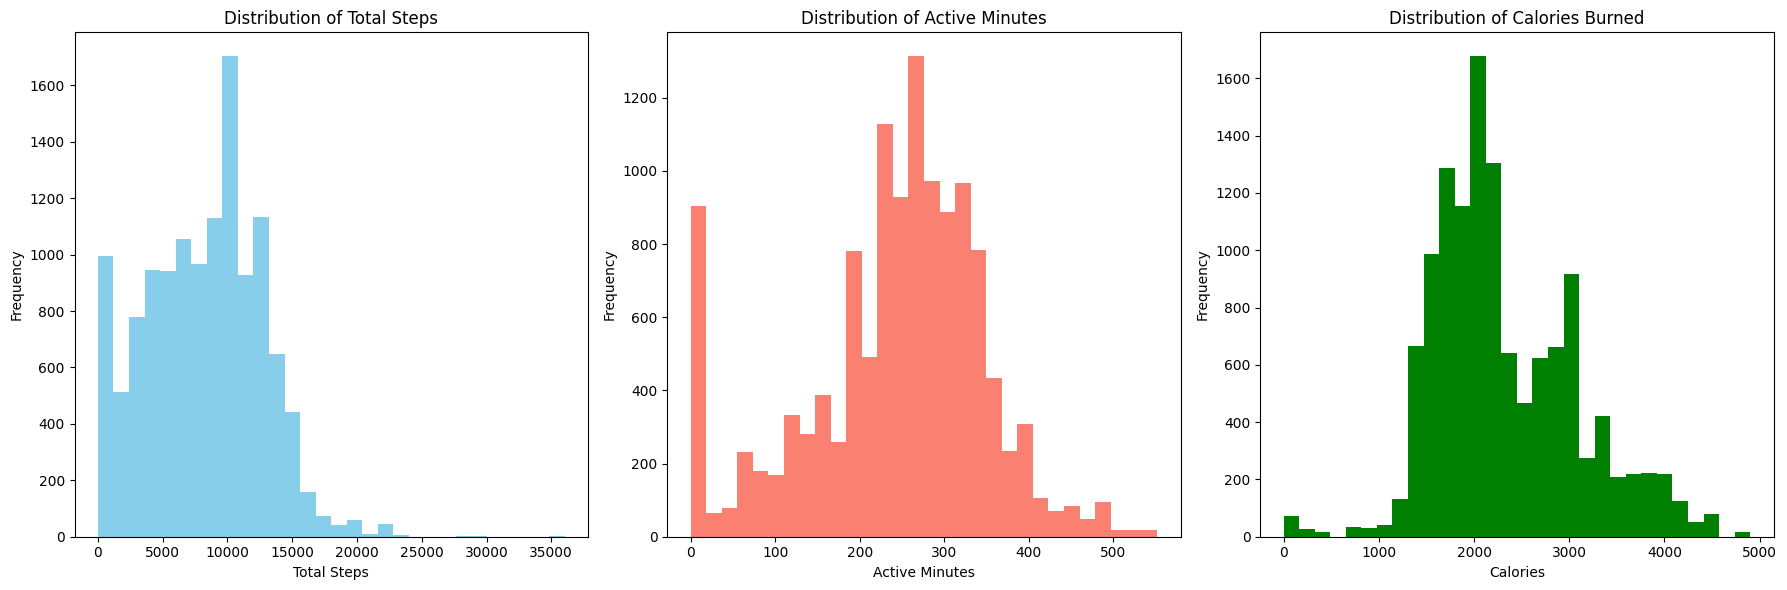

In [13]:
# Histograms of Total Steps, Active Minutes, and Calories

# Adjusting sleep data to use average instead of sum to avoid overestimation
combined_df['TotalMinutesAsleep'] = combined_df['TotalMinutesAsleep'] / combined_df.groupby('Id')['ActivityDate'].transform('count')
combined_df['TotalTimeInBed'] = combined_df['TotalTimeInBed'] / combined_df.groupby('Id')['ActivityDate'].transform('count')

plt.figure(figsize = (18, 6))

# Total Steps
plt.subplot(1, 3, 1)
plt.hist(combined_df['TotalSteps'], bins=30, color='skyblue')
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')

# Active Minutes (sum of all active minutes categories)
active_minutes = combined_df['VeryActiveMinutes'] + combined_df['FairlyActiveMinutes'] + combined_df['LightlyActiveMinutes']
plt.subplot(1, 3, 2)
plt.hist(active_minutes, bins=30, color='salmon')
plt.title('Distribution of Active Minutes')
plt.xlabel('Active Minutes')
plt.ylabel('Frequency')

# Calories Burned
plt.subplot(1, 3, 3)
plt.hist(combined_df['Calories'], bins=30, color='green')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- The distribution of total steps is somewhat right-skewed, indicating that most users take a moderate number of steps daily, with fewer users reaching very high step counts.

- Active minutes distribution is also right-skewed. Most users have fewer active minutes, with a decline in frequency as the number of active minutes increases.

- The calories burned follow a similar pattern, mostly centered around a mean with fewer instances of very high calorie burn.

##### 2. How do activity levels correlate with calories burned?

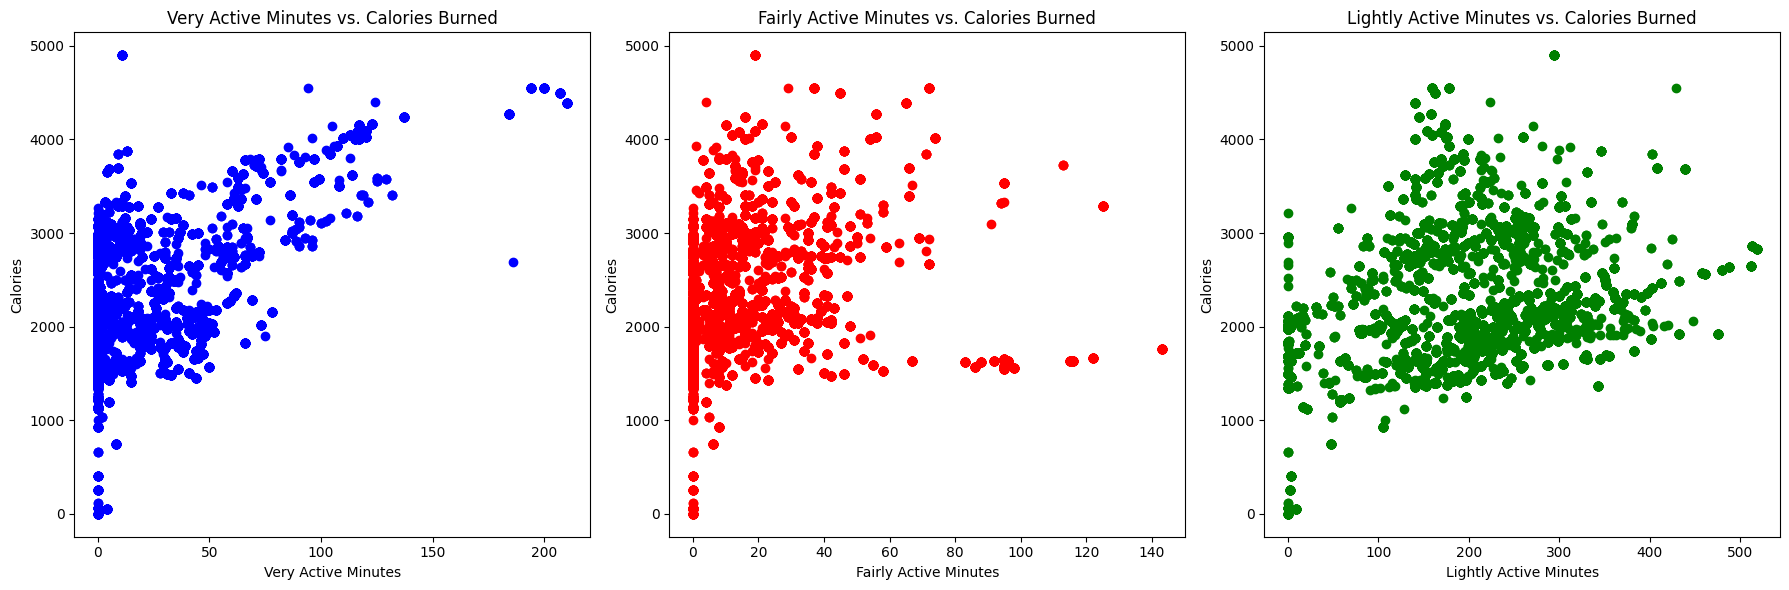

In [14]:
plt.figure(figsize = (18, 6))

# Very Active Minutes vs. Calories
plt.subplot(1, 3, 1)
plt.scatter(combined_df['VeryActiveMinutes'], combined_df['Calories'], color='blue')
plt.title('Very Active Minutes vs. Calories Burned')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')

# Fairly Active Minutes vs. Calories
plt.subplot(1, 3, 2)
plt.scatter(combined_df['FairlyActiveMinutes'], combined_df['Calories'], color='red')
plt.title('Fairly Active Minutes vs. Calories Burned')
plt.xlabel('Fairly Active Minutes')
plt.ylabel('Calories')

# Lightly Active Minutes vs. Calories
plt.subplot(1, 3, 3)
plt.scatter(combined_df['LightlyActiveMinutes'], combined_df['Calories'], color='green')
plt.title('Lightly Active Minutes vs. Calories Burned')
plt.xlabel('Lightly Active Minutes')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()

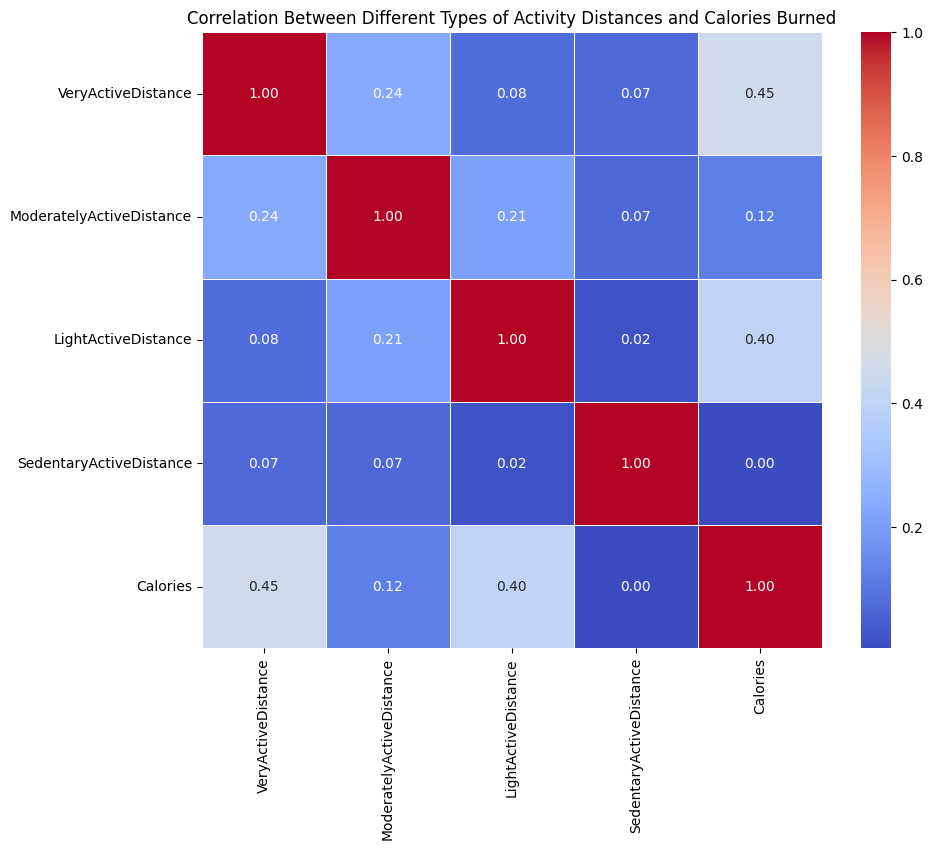

In [15]:
# Calculating correlation matrix for activity distances and calories
activity_correlations = combined_df[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'Calories']].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(activity_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Different Types of Activity Distances and Calories Burned')
plt.show()

- From the plots, there is a noticeable positive correlation, suggesting that higher intensity activities significantly contribute to greater caloric burn.

- There is a weaker correlation than very active minutes, indicating a moderate contribution to calorie burning.

- While light activities contribute to caloric expenditure, their impact is less pronounced compared to more vigorous activities.

##### 3. What is the trend of total steps and calories overtime, including their relationship?

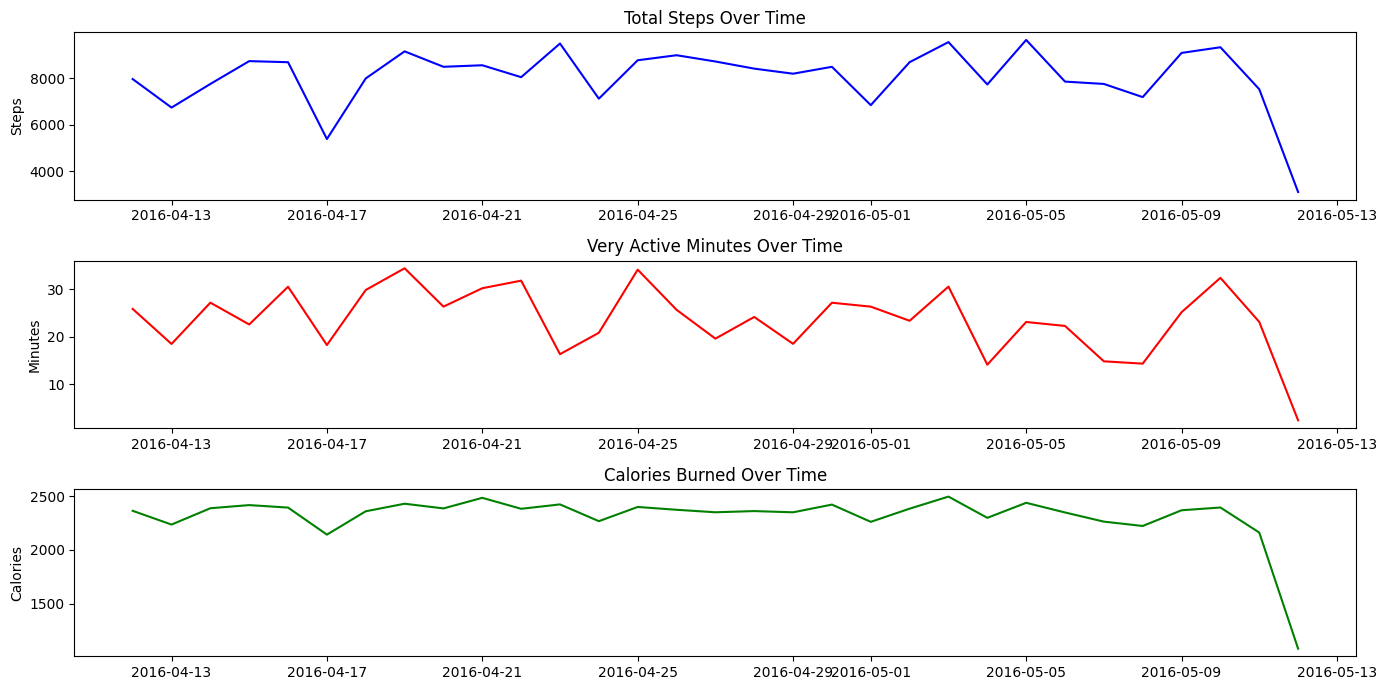

In [20]:
# Converting 'ActivityDate' to datetime format for better handling in time series analysis
combined_df['ActivityDate'] = pd.to_datetime(combined_df['ActivityDate'], format='%m/%d/%Y')

# Grouping data by date and calculating average total steps, very active minutes, and calories
time_trends = combined_df.groupby('ActivityDate').agg({
    'TotalSteps': 'mean',
    'VeryActiveMinutes': 'mean',
    'Calories': 'mean'
}).reset_index()

# Plotting trends over time for Total Steps, Very Active Minutes, and Calories
plt.figure(figsize=(14, 7))

# Total Steps
plt.subplot(3, 1, 1)
plt.plot(time_trends['ActivityDate'], time_trends['TotalSteps'], label='Total Steps', color='blue')
plt.title('Total Steps Over Time')
plt.ylabel('Steps')

# Very Active Minutes
plt.subplot(3, 1, 2)
plt.plot(time_trends['ActivityDate'], time_trends['VeryActiveMinutes'], label='Very Active Minutes', color='red')
plt.title('Very Active Minutes Over Time')
plt.ylabel('Minutes')

# Calories
plt.subplot(3, 1, 3)
plt.plot(time_trends['ActivityDate'], time_trends['Calories'], label='Calories Burned', color='green')
plt.title('Calories Burned Over Time')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()


The plot shows some variability with occasional peaks, which may correspond to specific days where users were more active.

The total steps taken show some variability over the period, with some peaks suggesting days of higher activity. These peaks could be due to specific events or more active days of the week.
Very Active Minutes Over Time metric also shows variability, aligning somewhat with the peaks in total steps, indicating that more steps are associated with more very active minutes.
There's a correlation between calories burned and both total steps and very active minutes, with notable peaks and troughs. The calorie expenditure tends to rise on days with higher activity.

##### 4. Are there any visible trends in activity levels over longer periods, such as weeks or months?

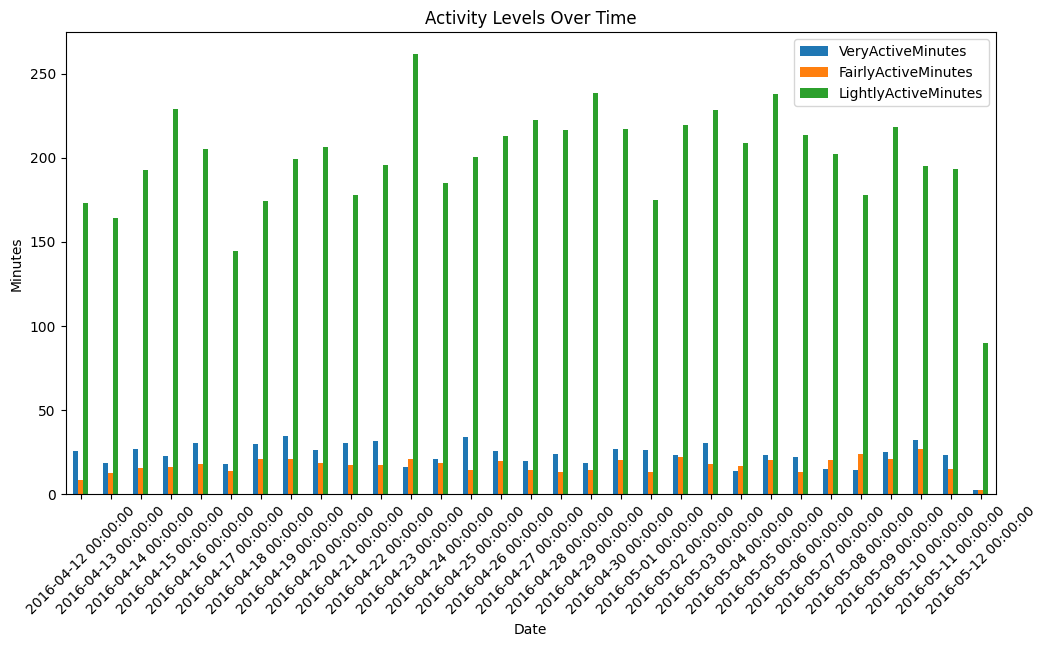

In [18]:
# Activity levels overtime - grouped bar chart

activity_levels = combined_df.groupby('ActivityDate')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].mean()

activity_levels.plot(kind = 'bar', figsize = (12, 6))
plt.title('Activity Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation = 45)
plt.show()

People are mostly lightly active. Very few people are very active and fairly active. 

##### 5. How do various activity levels (sedentary, light, moderate, very active) impact overall health metrics?

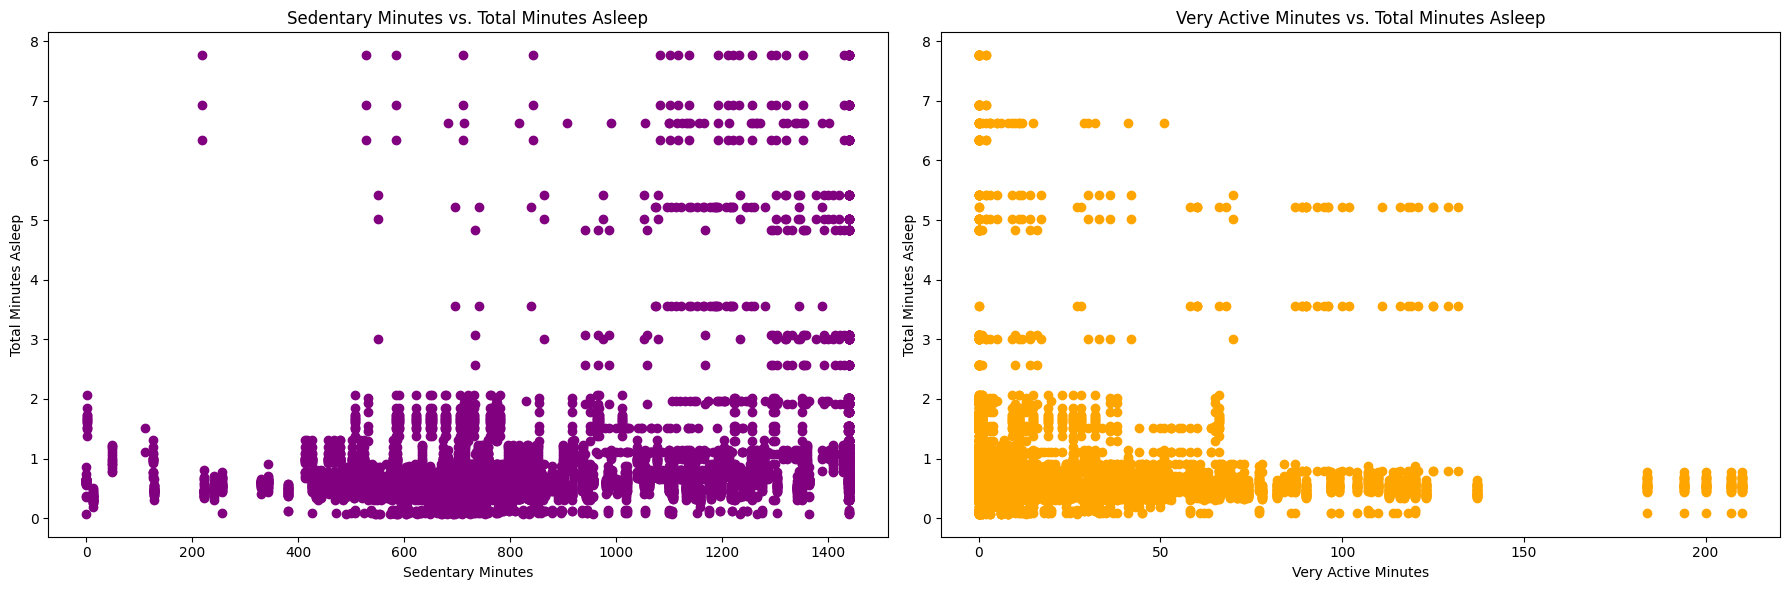

In [19]:
# Creating scatter plots to visualize the relationship between activity levels and sleep metrics
plt.figure(figsize=(18, 6))

# Sedentary Minutes vs. Total Minutes Asleep
plt.subplot(1, 2, 1)
plt.scatter(combined_df['SedentaryMinutes'], combined_df['TotalMinutesAsleep'], color='purple')
plt.title('Sedentary Minutes vs. Total Minutes Asleep')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Minutes Asleep')

# Very Active Minutes vs. Total Minutes Asleep
plt.subplot(1, 2, 2)
plt.scatter(combined_df['VeryActiveMinutes'], combined_df['TotalMinutesAsleep'], color='orange')
plt.title('Very Active Minutes vs. Total Minutes Asleep')
plt.xlabel('Very Active Minutes')
plt.ylabel('Total Minutes Asleep')

plt.tight_layout()
plt.show()

- There does not appear to be a strong correlation between sedentary behavior and the total minutes asleep, indicating that simply being inactive does not necessarily lead to longer sleep durations.

- Similarly, this plot does not show a clear trend, suggesting that higher levels of very active minutes do not directly correlate with sleep duration. However, the dispersion might hint at other factors influencing sleep beyond activity levels alone.

#### Conclusion

The analyses and visualizations provided insights into the physical activity patterns of users, correlations between activity levels and calories burned, and the impact of these activities on health metrics like sleep quality. 

Key findings include:

- Higher intensity activities have a significant impact on calorie burn.
- Activity patterns show variability with some peaks, suggesting days with increased activity.
- There's no clear evidence from this analysis that activity levels strongly correlate with sleep duration, indicating complexity in the factors that influence sleep quality.